w = exp(-6.5*ob1)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import energyflow as ef
import energyflow.archs
import root_numpy
from matplotlib.colors import LogNorm
from sklearn.utils import shuffle

import omnifold
import modplot
import ibu

Welcome to JupyROOT 6.22/02


In [2]:
n_row = 20000

In [3]:
np.random.seed(0)

In [4]:
ob1 = np.random.random_sample((n_row,))
ob2 = np.arctan(ob1+1)
obs1 = ob1*(1+np.random.normal(loc=0, scale=0.1, size=n_row))
obs2 = ob2*(1+np.random.normal(loc=0, scale=0.15, size=n_row))
w = np.exp(-6.5*ob1)
relw = w/min(w)

In [5]:
max(relw)

664.7332045066404

In [6]:
print(min(ob1),max(ob1))
print(min(ob2),max(ob2))
print(min(obs1),max(obs1))
print(min(obs2),max(obs2))

7.2449638492178e-05 0.9999779517807228
0.7854343869044885 1.1071443081113448
7.416121571027753e-05 1.3141270511370569
0.22029107868137243 1.6869186517442716


In [7]:
data = []
data.append(ob1)
data.append(ob2)
data.append(obs1)
data.append(obs2)
data.append(relw)

df = pd.DataFrame(np.transpose(data), columns=['ob1','ob2','ob1s','ob2s','relw'])

In [8]:
odd = []
even = []
for i in range(0, df.shape[0]):
    if (i%2 == 0):
        even.append(i)
    else:
        odd.append(i)

In [9]:
df1 = df.iloc[odd]

In [10]:
df2 = df.iloc[even]

In [11]:
df3 = shuffle(df1.loc[df1.index.repeat(round(df1.relw))])

In [12]:
df4 = shuffle(df2.loc[df2.index.repeat(round(df2.relw))])

In [13]:
df3.shape[0],df4.shape[0]

(1038153, 1069427)

In [14]:
ob1low = 0
ob1high = 1.5
ob2low = 0.4
ob2high = 1.4
nbin = 20
binwidth1 = (ob1high-ob1low)/nbin
binwidth2 = (ob2high-ob2low)/nbin

Text(0.5, 0, 'detector ob2')

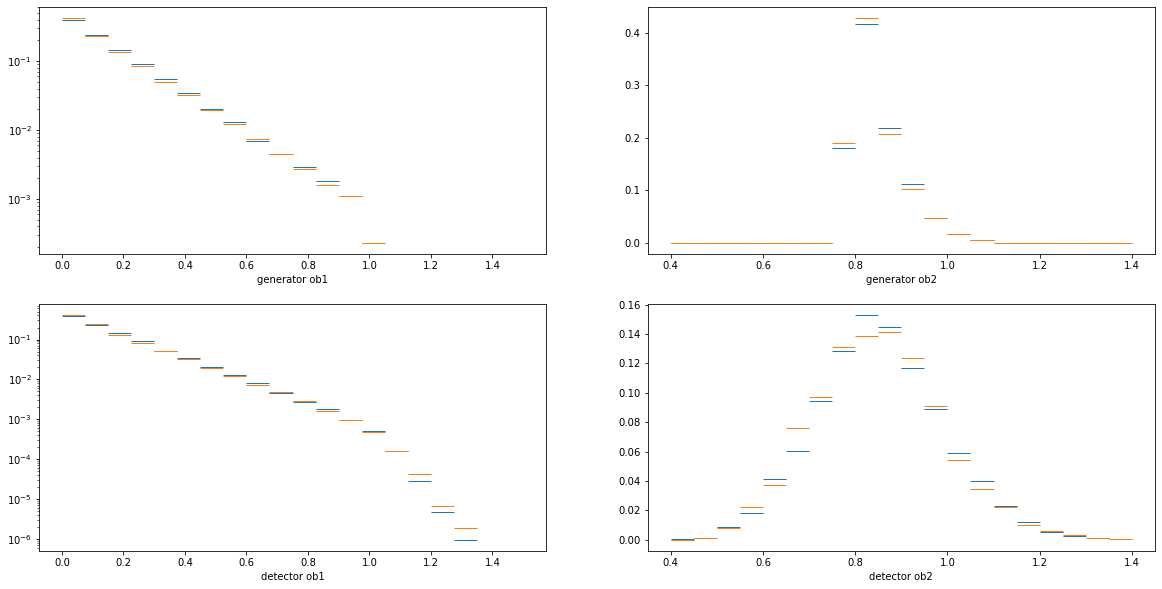

In [15]:
fig = plt.figure(figsize=(20,10))

ax1 = plt.subplot(221)
y3 = np.histogram(df3['ob1'], range=(ob1low,ob1high), bins=nbin)[0]
y4 = np.histogram(df4['ob1'], range=(ob1low,ob1high), bins=nbin)[0]
xerr1 = (ob1high-ob1low)/(2*nbin)
plt.errorbar(np.arange(ob1low+xerr1,ob1high+xerr1,binwidth1), y3/sum(y3), xerr=xerr1,ls='none', linewidth=1)
plt.errorbar(np.arange(ob1low+xerr1,ob1high+xerr1,binwidth1), y4/sum(y4), xerr=xerr1,ls='none', linewidth=1)
#plt.errorbar(np.arange(ptlow+xerr1,pthigh+xerr1), y3/sum(y3), xerr=xerr1, yerr=np.sqrt(y3)/sum(y3),ls='none', linewidth=1)
#plt.errorbar(np.arange(ptlow+xerr1,pthigh+xerr1), y4/sum(y4), xerr=xerr1, yerr=np.sqrt(y4)/sum(y4),ls='none', linewidth=1)
plt.xlabel('generator ob1')
plt.yscale('log')

ax2 = plt.subplot(222)
y3 = np.histogram(df3['ob2'], range=(ob2low,ob2high), bins=nbin)[0]
y4 = np.histogram(df4['ob2'], range=(ob2low,ob2high), bins=nbin)[0]
xerr2 = (ob2high-ob2low)/(2*nbin)
plt.errorbar(np.arange(ob2low+xerr2,ob2high+xerr2,binwidth2), y3/sum(y3), xerr=xerr2,ls='none', linewidth=1)
plt.errorbar(np.arange(ob2low+xerr2,ob2high+xerr2,binwidth2), y4/sum(y4), xerr=xerr2,ls='none', linewidth=1)
#plt.errorbar(np.arange(rglow+xerr1,rghigh+xerr1,2*xerr1), y3/sum(y3), xerr=xerr1,yerr=np.sqrt(y3)/sum(y3),ls='none',linewidth=1)
#plt.errorbar(np.arange(rglow+xerr1,rghigh+xerr1,2*xerr1), y4/sum(y4), xerr=xerr1,yerr=np.sqrt(y4)/sum(y4),ls='none',linewidth=1)
plt.xlabel('generator ob2')

ax3 = plt.subplot(223)
y3 = np.histogram(df3['ob1s'], range=(ob1low,ob1high), bins=nbin)[0]
y4 = np.histogram(df4['ob1s'], range=(ob1low,ob1high), bins=nbin)[0]
xerr1 = (ob1high-ob1low)/(2*nbin)
plt.errorbar(np.arange(ob1low+xerr1,ob1high+xerr1,binwidth1), y3/sum(y3), xerr=xerr1,ls='none', linewidth=1)
plt.errorbar(np.arange(ob1low+xerr1,ob1high+xerr1,binwidth1), y4/sum(y4), xerr=xerr1,ls='none', linewidth=1)
#plt.errorbar(np.arange(mlow+xerr1,mhigh+xerr1), y3/sum(y3), xerr=xerr1, yerr=np.sqrt(y3)/sum(y3),ls='none', linewidth=1)
#plt.errorbar(np.arange(mlow+xerr1,mhigh+xerr1), y4/sum(y4), xerr=xerr1, yerr=np.sqrt(y4)/sum(y4),ls='none', linewidth=1)
plt.xlabel('detector ob1')
plt.yscale('log')

ax4 = plt.subplot(224)
y3 = np.histogram(df3['ob2s'], range=(ob2low,ob2high), bins=nbin)[0]
y4 = np.histogram(df4['ob2s'], range=(ob2low,ob2high), bins=nbin)[0]
xerr2 = (ob2high-ob2low)/(2*nbin)
plt.errorbar(np.arange(ob2low+xerr2,ob2high+xerr2,binwidth2), y3/sum(y3), xerr=xerr2,ls='none', linewidth=1)
plt.errorbar(np.arange(ob2low+xerr2,ob2high+xerr2,binwidth2), y4/sum(y4), xerr=xerr2,ls='none', linewidth=1)
#plt.errorbar(np.arange(ptlow+xerr1,pthigh+xerr1), y3/sum(y3), xerr=xerr1, yerr=np.sqrt(y3)/sum(y3),ls='none', linewidth=1)
#plt.errorbar(np.arange(ptlow+xerr1,pthigh+xerr1), y4/sum(y4), xerr=xerr1, yerr=np.sqrt(y4)/sum(y4),ls='none', linewidth=1)
plt.xlabel('detector ob2')

In [16]:
datasets = { 'pythia' : df3, 'data' : df4 }

In [17]:
plt.rcParams['figure.figsize'] = (4,4)
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = '8'

In [18]:
itnum = 4

In [19]:
obs_multifold = ['ob1','ob2']

In [20]:
obs = {}

obs.setdefault('ob1', {}).update({
    'func': lambda dset, s: np.asarray(datasets[dset]['ob1'+s]),
    'nbins_det': 20, 'nbins_mc': 20,
    'xlim': (ob1low, ob1high), 'ylim': (0.00001, 100),
    'xlabel': r'ob1','symbol': 'ob1',
    'ylabel': '' ,
    'yscale': 'log'
})

obs.setdefault('ob2', {}).update({
    'func': lambda dset, s: np.asarray(datasets[dset]['ob2'+s]),
    'nbins_det': 20, 'nbins_mc': 20,
    'xlim': (0.5, 1.5), 'ylim': (0.00001, 10),
    'xlabel': r'ob2','symbol': 'ob2',
    'ylabel': '' 
    #'yscale': 'log'
})

# additional histogram and plot style information
hist_style = {'histtype': 'step', 'density': True, 'lw': 1, 'zorder': 2}
gen_style = {'linestyle': '--', 'color': 'blue', 'lw': 1.15, 'label': 'PYTHIA truth'}
truth_style = {'step': 'mid', 'edgecolor': 'green', 'facecolor': (0.75, 0.875, 0.75),
               'lw': 1.25, 'zorder': 0, 'label': '``Truth\"'}
ibu_style = {'ls': '-', 'marker': 'o', 'ms': 2.5, 'color': 'gray', 'zorder': 1}
omnifold_style = {'ls': '-', 'marker': 's', 'ms': 2.5, 'color': 'tab:red', 'zorder': 3}

In [21]:
# calculate quantities to be stored in obs
for obkey,ob in obs.items():
    
    # calculate observable for GEN, SIM, DATA, and TRUE
    ob['genobs'], ob['simobs'] = ob['func']('pythia', ''), ob['func']('pythia', 's')
    ob['truthobs'], ob['dataobs'] = ob['func']('data', ''), ob['func']('data', 's')
    
    print(ob['genobs'])
    # setup bins
    ob['bins_det'] = np.linspace(ob['xlim'][0], ob['xlim'][1], ob['nbins_det']+1)
    ob['bins_mc'] = np.linspace(ob['xlim'][0], ob['xlim'][1], ob['nbins_mc']+1)
    ob['midbins_det'] = (ob['bins_det'][:-1] + ob['bins_det'][1:])/2
    ob['midbins_mc'] = (ob['bins_mc'][:-1] + ob['bins_mc'][1:])/2
    ob['binwidth_det'] = ob['bins_det'][1] - ob['bins_det'][0]
    ob['binwidth_mc'] = ob['bins_mc'][1] - ob['bins_mc'][0]
    
    # get the histograms of GEN, DATA, and TRUTH level observables
    ob['genobs_hist'] = np.histogram(ob['genobs'], bins=ob['bins_mc'], density=True)[0]
    ob['data_hist'] = np.histogram(ob['dataobs'], bins=ob['bins_det'], density=True)[0]
    ob['truth_hist'], ob['truth_hist_unc'] = modplot.calc_hist(ob['truthobs'], bins=ob['bins_mc'], 
                                                               density=True)[:2]

    # compute (and normalize) the response matrix between GEN and SIM
    ob['response'] = np.histogram2d(ob['simobs'], ob['genobs'], bins=(ob['bins_det'], ob['bins_mc']))[0]
    ob['response'] /= (ob['response'].sum(axis=0) + 10**-50)
    
    # perform iterative Bayesian unfolding
    ob['ibu_phis'] = ibu.ibu(ob['data_hist'], ob['response'], ob['genobs_hist'], 
                         ob['binwidth_det'], ob['binwidth_mc'], it=itnum)
    ob['ibu_phi_unc'] = ibu.ibu_unc(ob, it=itnum, nresamples=25)
    
    print('Done with', obkey)

[0.00469548 0.02519029 0.0929656  ... 0.19722378 0.22487588 0.1070395 ]
Done with ob1
[0.7877404  0.797836   0.82978711 ... 0.8749187  0.88612952 0.83615543]
Done with ob2


In [22]:
#model_layer_sizes = [100, 100]
model_layer_sizes = [100, 100, 100] # use this for the full network size

# set up the array of data/simulation detector-level observables
X_det = np.asarray([np.concatenate((obs[obkey]['dataobs'], obs[obkey]['simobs'])) for obkey in obs_multifold]).T
Y_det = ef.utils.to_categorical(np.concatenate((np.ones(len(obs['ob1']['dataobs'])), 
                                                np.zeros(len(obs['ob1']['simobs'])))))

# set up the array of generation particle-level observables
X_gen = np.asarray([np.concatenate((obs[obkey]['genobs'], obs[obkey]['genobs'])) for obkey in obs_multifold]).T
Y_gen = ef.utils.to_categorical(np.concatenate((np.ones(len(obs['ob1']['genobs'])), 
                                                np.zeros(len(obs['ob1']['genobs'])))))

# standardize the inputs
X_det = (X_det - np.mean(X_det, axis=0))/np.std(X_det, axis=0)
X_gen = (X_gen - np.mean(X_gen, axis=0))/np.std(X_gen, axis=0)

# Specify the training parameters
# model parameters for the Step 1 network
det_args = {'input_dim': len(obs_multifold), 'dense_sizes': model_layer_sizes,
            'patience': 10, 'filepath': 'Step1_{}', 'save_weights_only': False, 
            'modelcheck_opts': {'save_best_only': True, 'verbose': 1}}

# model parameters for the Step 2 network
mc_args = {'input_dim': len(obs_multifold), 'dense_sizes': model_layer_sizes, 
           'patience': 10, 'filepath': 'Step2_{}', 'save_weights_only': False, 
           'modelcheck_opts': {'save_best_only': True, 'verbose': 1}}

# general training parameters
#fitargs = {'batch_size': 500, 'epochs': 2, 'verbose': 1}
fitargs = {'batch_size': 500, 'epochs': 100, 'verbose': 1} # use this for a full training

# reweight the sim and data to have the same total weight to begin with
ndata, nsim = np.count_nonzero(
    Y_det[:,1]), np.count_nonzero(Y_det[:,0])
wdata = np.ones(ndata)
winit = ndata/nsim*np.ones(nsim)

In [ ]:
# apply the OmniFold procedure to get weights for the generation
multifold_ws = omnifold.omnifold(X_gen, Y_gen, X_det, Y_det, wdata, winit,
                                (ef.archs.DNN, det_args), (ef.archs.DNN, mc_args),
                                fitargs, val=0.2, it=itnum, trw_ind=-2, weights_filename='5271310')

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 2)]               0         
_________________________________________________________________
dense_0 (Dense)              (None, 100)               300       
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
activation_2 (Activation)    (None, 100)              

Epoch 13/100
3369/3373 [============================>.] - ETA: 0s - loss: 0.6065 - acc: 0.6462
Epoch 00013: val_loss improved from 0.60878 to 0.60533, saving model to Step1_0_Epoch-13
INFO:tensorflow:Assets written to: Step1_0_Epoch-13/assets
3373/3373 [==============================] - 24s 7ms/step - loss: 0.6065 - acc: 0.6462 - val_loss: 0.6053 - val_acc: 0.6495
Epoch 14/100
3368/3373 [============================>.] - ETA: 0s - loss: 0.6016 - acc: 0.6508
Epoch 00014: val_loss improved from 0.60533 to 0.60071, saving model to Step1_0_Epoch-14
INFO:tensorflow:Assets written to: Step1_0_Epoch-14/assets
3373/3373 [==============================] - 25s 7ms/step - loss: 0.6016 - acc: 0.6508 - val_loss: 0.6007 - val_acc: 0.6529
Epoch 15/100
3368/3373 [============================>.] - ETA: 0s - loss: 0.5968 - acc: 0.6544
Epoch 00015: val_loss improved from 0.60071 to 0.59355, saving model to Step1_0_Epoch-15
INFO:tensorflow:Assets written to: Step1_0_Epoch-15/assets
3373/3373 [============

Epoch 38/100
3369/3373 [============================>.] - ETA: 0s - loss: 0.5296 - acc: 0.7033
Epoch 00038: val_loss improved from 0.53337 to 0.53148, saving model to Step1_0_Epoch-38
INFO:tensorflow:Assets written to: Step1_0_Epoch-38/assets
3373/3373 [==============================] - 24s 7ms/step - loss: 0.5296 - acc: 0.7033 - val_loss: 0.5315 - val_acc: 0.7013
Epoch 39/100
3370/3373 [============================>.] - ETA: 0s - loss: 0.5277 - acc: 0.7045
Epoch 00039: val_loss did not improve from 0.53148
3373/3373 [==============================] - 23s 7ms/step - loss: 0.5277 - acc: 0.7045 - val_loss: 0.5324 - val_acc: 0.7052
Epoch 40/100
3369/3373 [============================>.] - ETA: 0s - loss: 0.5256 - acc: 0.7061
Epoch 00040: val_loss improved from 0.53148 to 0.52688, saving model to Step1_0_Epoch-40
INFO:tensorflow:Assets written to: Step1_0_Epoch-40/assets
3373/3373 [==============================] - 24s 7ms/step - loss: 0.5256 - acc: 0.7061 - val_loss: 0.5269 - val_acc: 0.7

3367/3373 [============================>.] - ETA: 0s - loss: 0.4910 - acc: 0.7285
Epoch 00065: val_loss improved from 0.49179 to 0.48896, saving model to Step1_0_Epoch-65
INFO:tensorflow:Assets written to: Step1_0_Epoch-65/assets
3373/3373 [==============================] - 24s 7ms/step - loss: 0.4910 - acc: 0.7285 - val_loss: 0.4890 - val_acc: 0.7293
Epoch 66/100
2926/3373 [=========================>....] - ETA: 2s - loss: 0.4909 - acc: 0.7294

In [26]:
def axes(ratio_plot=True, figsize=(4,4), gridspec_update=None,
         xlabel='', ylabel=r'Probability Density', ylabel_ratio='Ratio to\nTruth', units='', 
         xlim=(0,1), ylim=(0,1), ylim_ratio=(0.5,1.5),
         xticks=None, yticks=None, xtick_step=None, ytick_step=None, ytick_ratio_step=0.25,
         **kwargs):
    
    # gridspec options
    gridspec_kw = {'height_ratios': (3.5, 1) if ratio_plot else (1,), 'hspace': 0.0}
    if isinstance(gridspec_update, dict):
        gridspec_kw.update(gridspec_update)

    # get subplots
    nsubplots = 2 if ratio_plot else 1
    fig, axes = plt.subplots(nsubplots,  gridspec_kw=gridspec_kw, figsize=figsize)
    if nsubplots == 1:
        axes = [axes]
        
    # axes limits
    for ax in axes:
        ax.set_xlim(*xlim)
    axes[0].set_ylim(*ylim)
    #axes[0].set_yscale('log')
    #axes[0].set_ylim(bottom=0.00001, top=2)
    if ratio_plot:
        axes[1].set_ylim(*ylim_ratio)
        
    # axes labels
    if units:
        xlabel = r'{} [{}]'.format(xlabel, units)
        ylabel = r'{} [{}{}]'.format(ylabel, units, r'$^{-1}$')
    axes[-1].set_xlabel(xlabel)
    axes[0].set_ylabel(ylabel)
    if ratio_plot:
        axes[1].set_ylabel(ylabel_ratio, fontsize=8)
        
    # tick settings
    for ax in axes:
        ax.minorticks_on()
        ax.tick_params(top=True, right=True, bottom=True, left=True, direction='in', which='both')
    if ratio_plot:
        axes[0].tick_params(labelbottom=False)
        axes[1].tick_params(axis='y', labelsize=8)
    
    # tick locations and labels
    if xtick_step is not None:
        xticks_locs = [round(xlim[0] + i*xtick_step, 4) for i in range(1+math.floor((xlim[1]-xlim[0])/xtick_step))]
        axes[-1].set_xticks(xticks_locs)
        if xticks is None:
            axes[-1].set_xticklabels(list(map(str, xticks_locs)))
        else:
            axes[-1].set_xticklabels(xticks)
    if ytick_step is not None:
        yticks_locs = [round(ylim[0] + i*ytick_step, 4) for i in range(1+math.floor((ylim[1]-ylim[0])/ytick_step))]
        axes[0].set_yticks(yticks_locs)
        if yticks is None:
            axes[0].set_yticklabels(list(map(str, yticks_locs)))
        else:
            axes[0].set_yticklabels(yticks)
    if ytick_ratio_step is not None and ratio_plot:
        yticks = [round(ylim_ratio[0] + i*ytick_ratio_step, 4)
                  for i in range(1+round((ylim_ratio[1]-ylim_ratio[0])/ytick_ratio_step))][1:-1]
        axes[1].set_yticks(yticks)
        axes[1].set_yticklabels(list(map(str, yticks)))
    
    return fig, axes

[0.0375 0.1125 0.1875 0.2625 0.3375 0.4125 0.4875 0.5625 0.6375 0.7125
 0.7875 0.8625 0.9375 1.0125 1.0875 1.1625 1.2375 1.3125 1.3875 1.4625]


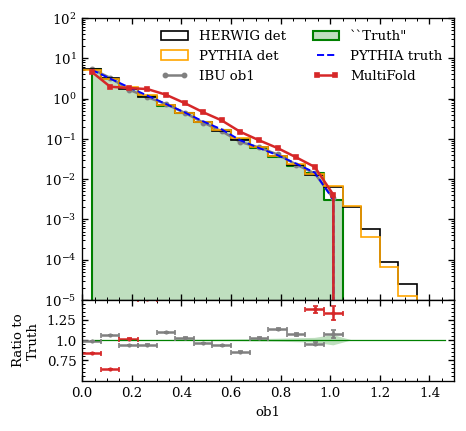

[0.525 0.575 0.625 0.675 0.725 0.775 0.825 0.875 0.925 0.975 1.025 1.075
 1.125 1.175 1.225 1.275 1.325 1.375 1.425 1.475]


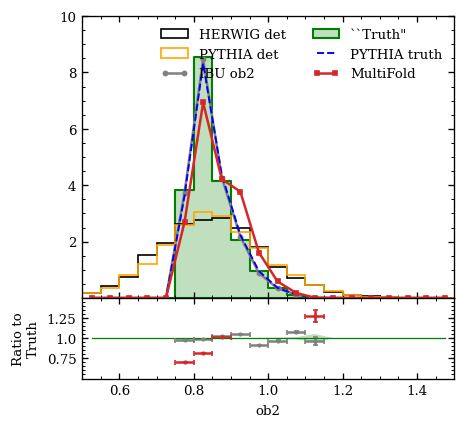

In [27]:
for i,(obkey,ob) in enumerate(obs.items()):
    
    # get the styled axes on which to plot
    fig, [ax0, ax1] = axes(**ob)
    if ob.get('yscale') is not None:
        ax0.set_yscale(ob['yscale'])
    #ax0.set_yscale('log')

        
    # Plot the Different Distributions of the Observable
    # plot the "data" histogram of the observable
    ax0.hist(ob['dataobs'], bins=ob['bins_det'], color='black', label='HERWIG det', **hist_style)

    # plot the "sim" histogram of the observable
    ax0.hist(ob['simobs'], bins=ob['bins_det'], color='orange', label='PYTHIA det', **hist_style)

    # plot the "gen" histogram of the observable
    ax0.plot(ob['midbins_mc'], ob['genobs_hist'], **gen_style)

    # plot the "truth" histogram of the observable
    ax0.fill_between(ob['midbins_mc'], ob['truth_hist'], **truth_style)

    
    # Plot the Unfolded Distributions of the Observable
    # plot the OmniFold distribution
    of_histgen, of_histgen_unc = modplot.calc_hist(ob['genobs'], weights=multifold_ws[2*itnum], 
                                                   bins=ob['bins_mc'], density=True)[:2]
    ax0.plot(ob['midbins_mc'], of_histgen, **omnifold_style, label='MultiFold')
           
    # plot the IBU distribution
    ax0.plot(ob['midbins_mc'], ob['ibu_phis'][itnum], **ibu_style, label='IBU ' + ob['symbol'])

    # Plot the Ratios of the OmniFold and IBU distributions to truth (with statistical uncertainties)
    ibu_ratio = ob['ibu_phis'][itnum]/(ob['truth_hist'] + 10**-50)
    of_ratio = of_histgen/(ob['truth_hist'] + 10**-50)
    ax1.plot([np.min(ob['midbins_mc']), np.max(ob['midbins_mc'])], [1, 1], '-', color='green', lw=0.75)
    
    # ratio uncertainties
    truth_unc_ratio = ob['truth_hist_unc']/(ob['truth_hist'] + 10**-50)
    ibu_unc_ratio = ob['ibu_phi_unc']/(ob['truth_hist'] + 10**-50)
    of_unc_ratio = of_histgen_unc/(ob['truth_hist'] + 10**-50)
    
    ax1.fill_between(ob['midbins_mc'], 1 - truth_unc_ratio, 1 + truth_unc_ratio, 
                     facecolor=truth_style['facecolor'], zorder=-2)
    ax1.errorbar(ob['midbins_mc'], ibu_ratio, xerr=ob['binwidth_mc']/2, yerr=ibu_unc_ratio, 
                                              color=ibu_style['color'], **modplot.style('errorbar'))
    ax1.errorbar(ob['midbins_mc'], of_ratio, xerr=ob['binwidth_mc']/2, yerr=of_unc_ratio, 
                                              color=omnifold_style['color'], **modplot.style('errorbar'))
    
    print(ob['midbins_mc'])
    # legend style and ordering
    loc, ncol = ob.get('legend_loc', 'upper right'), ob.get('legend_ncol', 2)
    order = [3, 4, 2, 5, 0, 1] if ncol==2 else [3, 5, 4, 0, 2, 1]
    modplot.legend(ax=ax0, frameon=False, order=order, loc=loc, ncol=ncol)

    plt.show()